In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data = pd.read_csv("Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [9]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [10]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [6]:
data[data.duplicated(keep='first')]

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


single     226272
married     25728
Name: Married/Single, dtype: int64


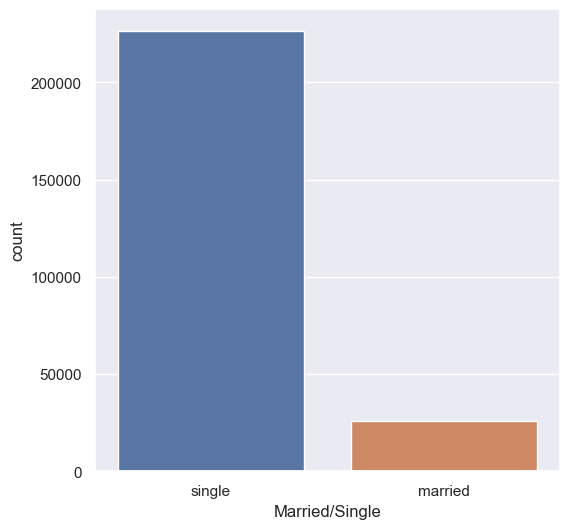

In [39]:
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()
categorical_valcount_hist("Married/Single")

In [9]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64


In [10]:
print( "Total categories in Profession:", len( data["Profession"].unique() ) )
print()
data["Profession"].value_counts()

Total categories in Profession: 51



Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [11]:
print( "Total categories in City:", len( data["CITY"].unique() ) )
print()
data["CITY"].value_counts()

Total categories in City: 317



Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

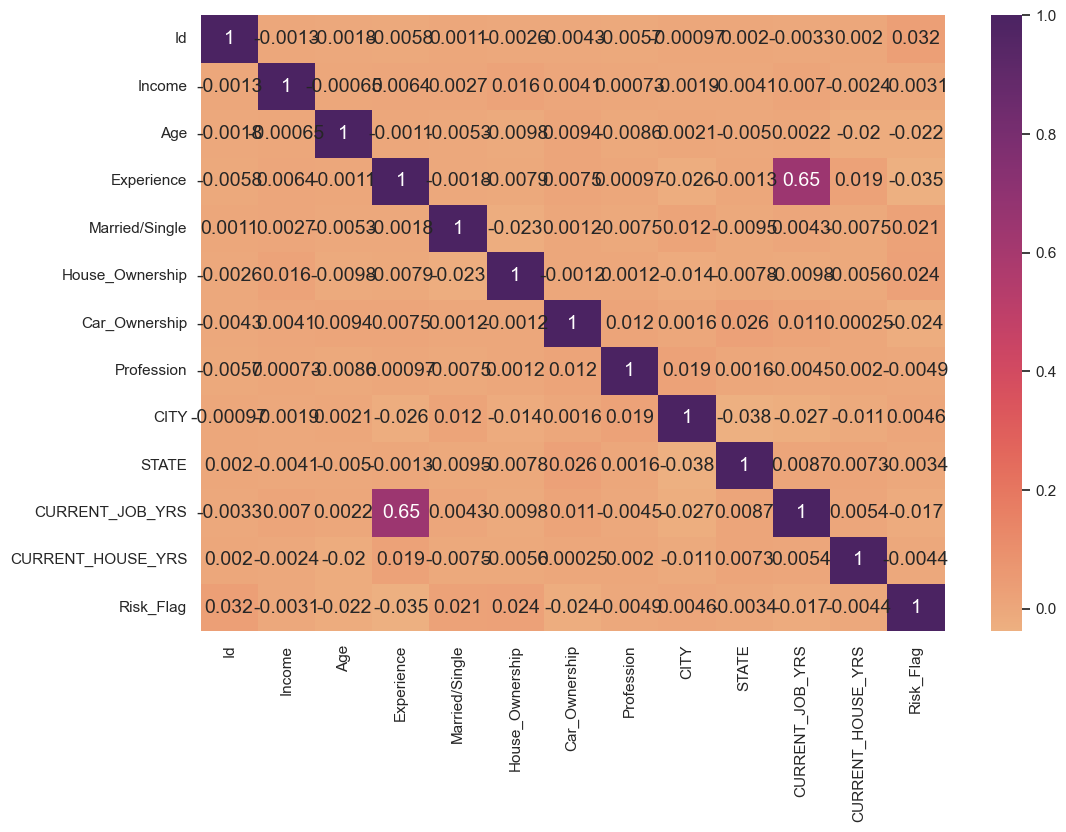

In [4]:
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [11]:
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

# Loop through each categorical column and apply label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [12]:
data.describe()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,158.137675,13.808952,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,92.201736,9.372300,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,157.000000,14.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000,1.000000


In [13]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1


In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the scaler objects
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply min-max scaling to selected numerical features
numerical_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
data[numerical_features] = min_max_scaler.fit_transform(data[numerical_features])


In [15]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,0.129487,0.034483,0.15,1,2,0,33,251,13,0.214286,0.75,0
1,2,0.757206,0.327586,0.50,1,2,0,43,227,14,0.642857,0.75,0
2,3,0.398564,0.775862,0.20,0,2,0,47,8,12,0.285714,0.00,0
3,4,0.625263,0.344828,0.10,1,2,1,43,54,17,0.142857,0.50,1
4,5,0.576454,0.448276,0.55,1,2,0,11,296,22,0.214286,1.00,1


In [16]:
import numpy as np

# Define the upper and lower bounds for outlier removal
lower_bound = 0.1
upper_bound = 0.9

# Assuming 'data' is your DataFrame containing the dataset

# Calculate the lower and upper percentile values for each numerical feature
numerical_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
lower_percentiles = data[numerical_features].quantile(lower_bound)
upper_percentiles = data[numerical_features].quantile(upper_bound)

# Filter rows based on the specified bounds for each feature
condition = ((data[numerical_features] >= lower_percentiles) & (data[numerical_features] <= upper_percentiles)).all(axis=1)
filtered_data = data[condition]

In [17]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128667 entries, 1 to 251997
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 128667 non-null  int64  
 1   Income             128667 non-null  float64
 2   Age                128667 non-null  float64
 3   Experience         128667 non-null  float64
 4   Married/Single     128667 non-null  int32  
 5   House_Ownership    128667 non-null  int32  
 6   Car_Ownership      128667 non-null  int32  
 7   Profession         128667 non-null  int32  
 8   CITY               128667 non-null  int32  
 9   STATE              128667 non-null  int32  
 10  CURRENT_JOB_YRS    128667 non-null  float64
 11  CURRENT_HOUSE_YRS  128667 non-null  float64
 12  Risk_Flag          128667 non-null  int64  
dtypes: float64(5), int32(6), int64(2)
memory usage: 10.8 MB


In [18]:
# Assuming 'Risk_Flag' is your target variable, replace it with your actual target column name
X = filtered_data.drop(columns=['Id','Risk_Flag'])  # Features
y = filtered_data['Risk_Flag']  # Target variable


In [14]:
filtered_data['Risk_Flag'].value_counts()

0    113487
1     15180
Name: Risk_Flag, dtype: int64

In [15]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Optionally, you can check the class distribution after oversampling
print("Class distribution after oversampling:", np.bincount(y_resampled))


Class distribution after oversampling: [113487 113487]


In [20]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes':GaussianNB()
}

# Train each model
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model

# Define a function to print performance metrics
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print()

# Evaluate each trained model
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)
    print_metrics(y_test, y_pred, model_name)


C:\Users\Trupti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import tkinter as tk
from tkinter import messagebox

best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train,y_train)

In [ ]:
def preprocess_input_data(input_data):
    input_data = encode_categorical(input_data)
    input_data = scale_numerical(input_data)
    return input_data

def encode_categorical(input_data):
    for col in categorical_columns:
        input_data[col] = label_encoder.fit_transform(input_data[col])
    return input_data

def scale_numerical(input_data):
    # Scale numerical features using the same scaler used during training
    input_data[numerical_features] = min_max_scaler.transform(input_data[numerical_features])
    return input_data
    
# Function to predict loan default
def predict_default():
    try:
        # Get input values from the entry widgets
        input_values = [entry.get() for entry in entry_widgets]

        # Preprocess the input data
        input_data = pd.DataFrame([input_values], columns=X.columns)
        preprocessed_input_data = preprocess_input_data(input_data)

        # Predict using the input values
        prediction = best_rf_model.predict(preprocessed_input_data)

        # Display prediction
        messagebox.showinfo("Prediction", f"The model predicts: {'Loan Default' if prediction[0] == 1 else 'No Loan Default'}")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid values")

# Create GUI
root = tk.Tk()
root.title("Loan Default Prediction")

# Create entry labels and widgets
selected_feature_names = data.drop(columns=['Id', 'Risk_Flag']).columns
entry_labels = selected_feature_names.tolist()
entry_widgets = []
for i, label in enumerate(entry_labels):
    tk.Label(root, text=label).grid(row=i, column=0, padx=10, pady=5)
    entry_widget = tk.Entry(root)
    entry_widget.grid(row=i, column=1, padx=10, pady=5)
    entry_widgets.append(entry_widget)

# Prediction button
predict_button = tk.Button(root, text="Predict", command=predict_default)
predict_button.grid(row=len(entry_labels), columnspan=2, padx=10, pady=10)

root.mainloop()

In [ ]:
#CODE WITH CONFUSION MATRIX

In [29]:
from sklearn.metrics import confusion_matrix

# Define a function to print performance metrics including confusion matrix
def print_metrics_with_confusion_matrix(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

# Evaluate each trained model
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)
    print_metrics_with_confusion_matrix(y_test, y_pred, model_name)


Model: Random Forest
Accuracy: 0.9554
Precision: 0.9180
Recall: 1.0000
F1-score: 0.9572
ROC AUC: 0.9556
Confusion Matrix:
[[5230  510]
 [   0 5707]]

Model: Gradient Boosting
Accuracy: 0.8122
Precision: 0.8178
Recall: 0.8020
F1-score: 0.8098
ROC AUC: 0.8121
Confusion Matrix:
[[4720 1020]
 [1130 4577]]

Model: KNN
Accuracy: 0.9203
Precision: 0.8712
Recall: 0.9860
F1-score: 0.9250
ROC AUC: 0.9205
Confusion Matrix:
[[4908  832]
 [  80 5627]]

Model: Logistic Regression
Accuracy: 0.5364
Precision: 0.5352
Recall: 0.5332
F1-score: 0.5342
ROC AUC: 0.5364
Confusion Matrix:
[[3097 2643]
 [2664 3043]]

Model: SVM
Accuracy: 0.5348
Precision: 0.5312
Recall: 0.5693
F1-score: 0.5496
ROC AUC: 0.5349
Confusion Matrix:
[[2873 2867]
 [2458 3249]]

Model: Decision Tree
Accuracy: 0.9409
Precision: 0.8940
Recall: 1.0000
F1-score: 0.9440
ROC AUC: 0.9410
Confusion Matrix:
[[5063  677]
 [   0 5707]]

Model: Naive Bayes
Accuracy: 0.5486
Precision: 0.5392
Recall: 0.6508
F1-score: 0.5898
ROC AUC: 0.5489
Confusio

In [30]:
#USER DEFINED NB STILL WORKING ON IT

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from scipy.stats import norm
import numpy as np

# Load the dataset
# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
     return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

# Fit the Naive Bayes model on the training data
def custom_naive_bayes_fit(X, y, alpha=1e-9):
    Xy0 = X[y == 0]
    Xy1 = X[y == 1]
    priory0 = (len(Xy0) + 1) / (len(X) + 2)  # Laplace smoothing
    priory1 = (len(Xy1) + 1) / (len(X) + 2)
    distX1y0 = norm(np.mean(Xy0[:, 0]), np.std(Xy0[:, 0]) + alpha)  # Regularization term alpha
    distX2y0 = norm(np.mean(Xy0[:, 1]), np.std(Xy0[:, 1]) + alpha)
    distX1y1 = norm(np.mean(Xy1[:, 0]), np.std(Xy1[:, 0]) + alpha)
    distX2y1 = norm(np.mean(Xy1[:, 1]), np.std(Xy1[:, 1]) + alpha)
    return priory0, distX1y0, distX2y0, priory1, distX1y1, distX2y1

def custom_naive_bayes_predict(X, priory0, distX1y0, distX2y0, priory1, distX1y1, distX2y1):
    py0 = priory0 * distX1y0.pdf(X[:, 0]) * distX2y0.pdf(X[:, 1])
    py1 = priory1 * distX1y1.pdf(X[:, 0]) * distX2y1.pdf(X[:, 1])
    return np.where(py0 > py1, 0, 1)

# Binarize y_train and y_test
threshold = 0.5  # Set the threshold for binarization
y_train_binary = (y_train > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Fit the Naive Bayes model on the training data
prior_y0, distX1y0, distX2y0, prior_y1, distX1y1, distX2y1 = custom_naive_bayes_fit(X_train.to_numpy(), y_train_binary)

# Make predictions on training data
y_pred_train = custom_naive_bayes_predict(X_train.to_numpy(), prior_y0, distX1y0, distX2y0, prior_y1, distX1y1, distX2y1)

# Make predictions on testing data
y_pred_test = custom_naive_bayes_predict(X_test.to_numpy(), prior_y0, distX1y0, distX2y0, prior_y1, distX1y1, distX2y1)

# Calculate metrics
train_accuracy = accuracy_score(y_train_binary, y_pred_train)
test_accuracy = accuracy_score(y_test_binary, y_pred_test)
precision = precision_score(y_test_binary, y_pred_test)
recall = recall_score(y_test_binary, y_pred_test)
conf_matrix = confusion_matrix(y_test_binary, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)





Training Accuracy: 0.5120449035752506
Testing Accuracy: 0.5101773390407968
Precision: 0.5091240875912408
Recall: 0.4888733134746802
Confusion Matrix:
[[3050 2690]
 [2917 2790]]
